<a href="https://colab.research.google.com/github/Chaqmoqjon/Machine-Learning/blob/main/6_E_Commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.preprocessing import OrdinalEncoder

from sklearn.pipeline import Pipeline
from sklearn import metrics

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/refs/heads/main/E-Commerce-Dataset.csv')
df.head() #Churn ustuni bilan ishlaymiz. 1 - mijoz ketib qoladi. 0 - ketmaydi degani

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


##About Data

In [ ]:
df.shape

(5630, 20)

In [ ]:
# pip install xlrd=2.0.1

In [ ]:
df_info = pd.read_excel('/content/E-Commerce-Dataset.xlsx', usecols=[1, 2, 3], header=1)
df_info

,Data,Variable,Discerption
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [ ]:
df['Churn'].value_counts() #4682 qolgan mijoz. 948 ketgan mijoz

,count
Churn,
0,4682
1,948


In [ ]:
churn_rate = df['Churn'].value_counts() / len(df) *100

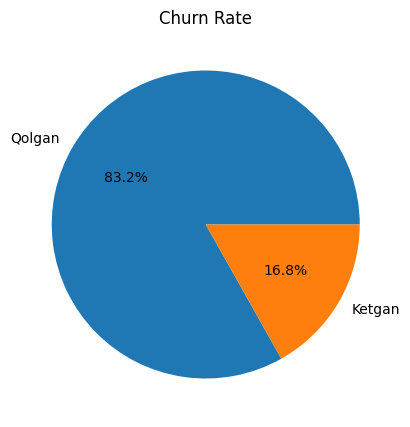

In [ ]:
plt.figure(figsize=(5, 5))
plt.pie(churn_rate, labels=['Qolgan', 'Ketgan'], autopct='%1.1f%%')
plt.title('Churn Rate')
plt.show()

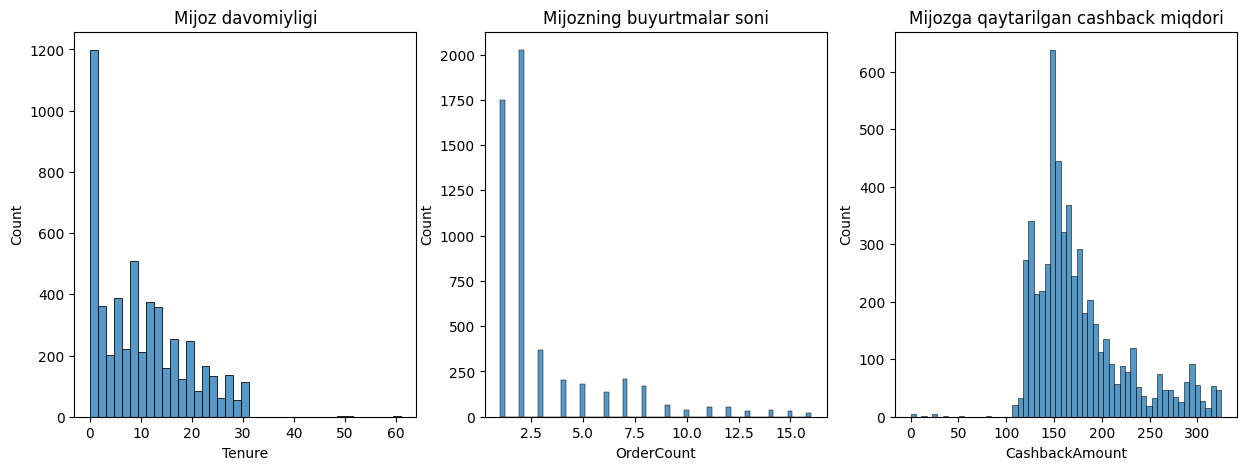

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#Tenure
sns.histplot(data = df, x  = 'Tenure', ax= axes[0])
axes[0].set_title('Mijoz davomiyligi')

#OrderCount
sns.histplot(data = df, x  = 'OrderCount', ax= axes[1])
axes[1].set_title('Mijozning buyurtmalar soni')

#CashbackAmount
sns.histplot(data = df, x  = 'CashbackAmount', ax= axes[2])
axes[2].set_title('Mijozga qaytarilgan cashback miqdori')

plt.show()

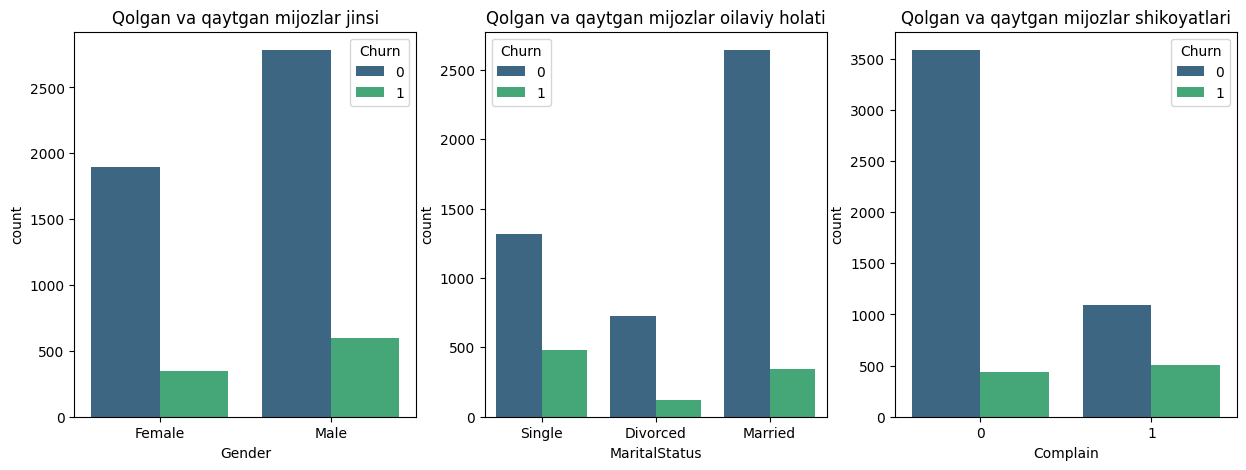

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#Gender
sns.countplot(data = df, x  = 'Gender', hue = 'Churn', palette='viridis', ax= axes[0])
axes[0].set_title('Qolgan va qaytgan mijozlar jinsi')

#MaritalStatus
sns.countplot(data = df, x  = 'MaritalStatus',  hue = 'Churn', palette='viridis', ax= axes[1])
axes[1].set_title('Qolgan va qaytgan mijozlar oilaviy holati')

#Complain
sns.countplot(data = df, x  = 'Complain',  hue = 'Churn', palette='viridis', ax= axes[2])
axes[2].set_title('Qolgan va qaytgan mijozlar shikoyatlari')

plt.show()

##Data change

In [ ]:
#hammasi ordinal encoder qildim. Chunki klassifikatsiyada ordinalning ahamiyati yo'q
or_enc = OrdinalEncoder()
df['Gender'] = or_enc.fit_transform(df[['Gender']])
df['MaritalStatus'] = or_enc.fit_transform(df[['MaritalStatus']])
df['PreferredLoginDevice'] = or_enc.fit_transform(df[['PreferredLoginDevice']])
df['PreferredPaymentMode'] = or_enc.fit_transform(df[['PreferredPaymentMode']])
df['PreferedOrderCat'] = or_enc.fit_transform(df[['PreferedOrderCat']])
df['MaritalStatus'] = or_enc.fit_transform(df[['MaritalStatus']])
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,1.0,3,6.0,4.0,0.0,3.0,3,2.0,2,2.0,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,2.0,1,8.0,6.0,1.0,3.0,4,3.0,3,2.0,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,2.0,1,30.0,4.0,1.0,2.0,4,3.0,3,2.0,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,2.0,3,15.0,4.0,1.0,2.0,4,2.0,5,2.0,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,2.0,1,12.0,0.0,1.0,NaN,3,3.0,5,2.0,3,0,11.0,1.0,1.0,3.0,130


In [ ]:
#korelatsiyasi bor  bo'lganligi uchun Churn ustuni bilan guruhlab NaN qiymatlar to'ldirildi
df['Tenure'] = df.groupby('Churn')['Tenure'].transform(lambda x: x.fillna(x.median()))
df['DaySinceLastOrder'] = df.groupby('Churn')['DaySinceLastOrder'].transform(lambda x: x.fillna(x.median()))
df['WarehouseToHome'] = df.groupby('Churn')['WarehouseToHome'].transform(lambda x: x.fillna(x.median()))

In [ ]:
#NaN qiymatlar soni
df.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,0
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,0
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0


In [ ]:
df.dropna(inplace=True, axis=1)

In [ ]:
df.corrwith(df['Churn'] , numeric_only=True).abs().sort_values(ascending=False)

,0
Churn,1.000000
Tenure,0.367219
Complain,0.250188
DaySinceLastOrder,0.167833
CashbackAmount,0.154161
MaritalStatus,0.140316
PreferedOrderCat,0.118922
NumberOfDeviceRegistered,0.107939
SatisfactionScore,0.105481
CityTier,0.084703


In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [ ]:
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

##LogisticRegression

In [ ]:
#modelni o'rgatish
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#predict va test
y_pred_LR = LR_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred_LR)) #ketib qolmaslikning topish aniqligi ~90% atrofida. Lekin ketib qolishini topish aniqligi 70, 50 % atrofida
print(metrics.accuracy_score(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       936
           1       0.72      0.51      0.59       190

    accuracy                           0.88      1126
   macro avg       0.81      0.73      0.76      1126
weighted avg       0.87      0.88      0.87      1126

0.8827708703374778


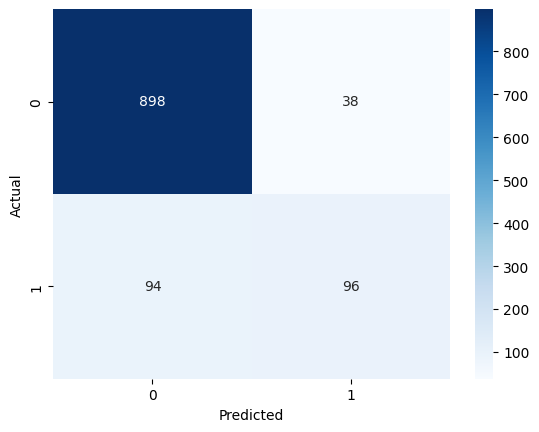

In [ ]:
#confusion matrix bilan test
conf_mat = metrics.confusion_matrix(y_test, y_pred_LR)
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()# ketib qolmaganlarning 898 tasini to'g'ri topdi. ketib qolganlardan 96 tasini to'g'ri topdi

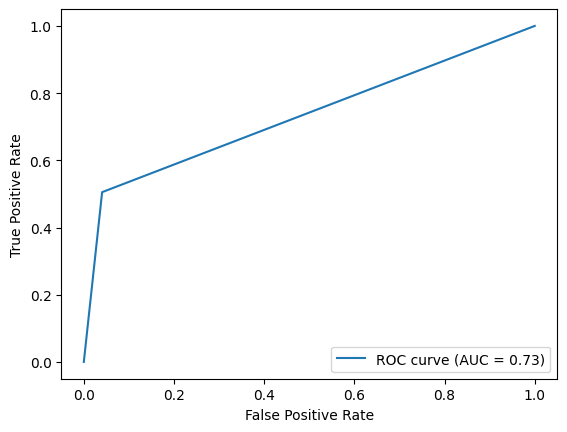

In [ ]:
#ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_LR)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show() #dioganaliga tekkis chiqsa yomon ishlayapti degani. 90° burchak ostida chizilsa zo'r degani

##SVM - Support Vector Machines

In [ ]:
SVM_model = SVC()
SVM_model.fit(X_train, y_train)

SVC()

In [ ]:
#classification_report
y_pred_SVM = SVM_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred_SVM))
print("Aniqlik", metrics.accuracy_score(y_test, y_pred_SVM))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       936
           1       0.86      0.63      0.72       190

    accuracy                           0.92      1126
   macro avg       0.89      0.80      0.84      1126
weighted avg       0.92      0.92      0.91      1126

Aniqlik 0.9191829484902309


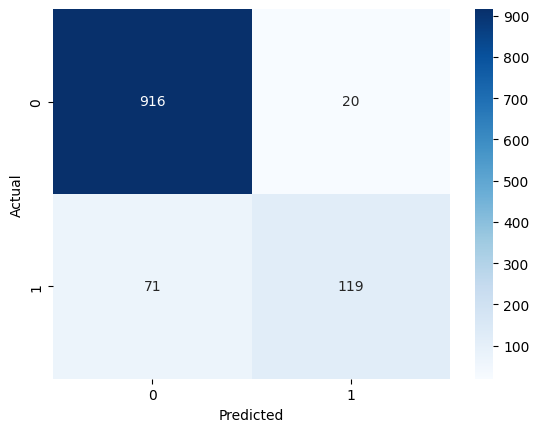

In [ ]:
#confusion matrix bilan test
conf_mat = metrics.confusion_matrix(y_test, y_pred_SVM)
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()# ketib qolmaganlarning 916 tasini to'g'ri topdi. ketib qolganlardan 119 tasini to'g'ri topdi

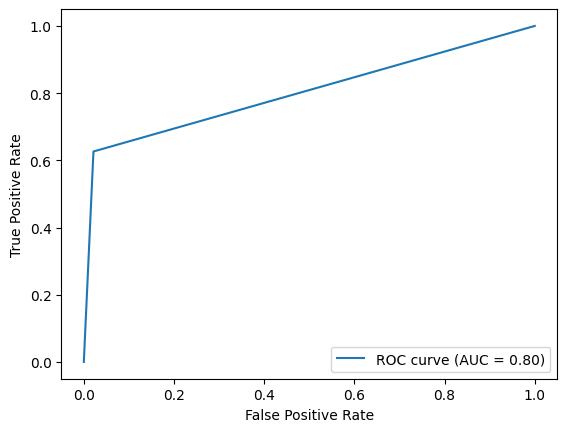

In [ ]:
#ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_SVM)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show() #dioganaliga tekkis chiqsa yomon ishlayapti degani. 90° burchak ostida chizilsa zo'r degani

##DecisionTreeClassifier

In [ ]:
DT_model = DecisionTreeClassifier() #hyperparametrs: max_depth va boshqalar. Ma'lumotlar ko'payib ketsa training qilish ko'p vaqt talab qiladi.
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_DT = DT_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred_DT))
print("Aniqlik: ", metrics.accuracy_score(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       936
           1       0.85      0.94      0.89       190

    accuracy                           0.96      1126
   macro avg       0.92      0.95      0.93      1126
weighted avg       0.96      0.96      0.96      1126

Aniqlik:  0.9609236234458259


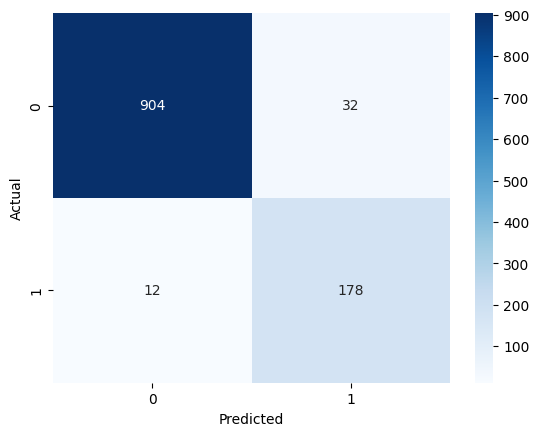

In [ ]:
#confusion matrix bilan test
conf_mat = metrics.confusion_matrix(y_test, y_pred_DT)
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()# ketib qolmaganlarning 904 tasini to'g'ri topdi. ketib qolganlardan 173 tasini to'g'ri topdi

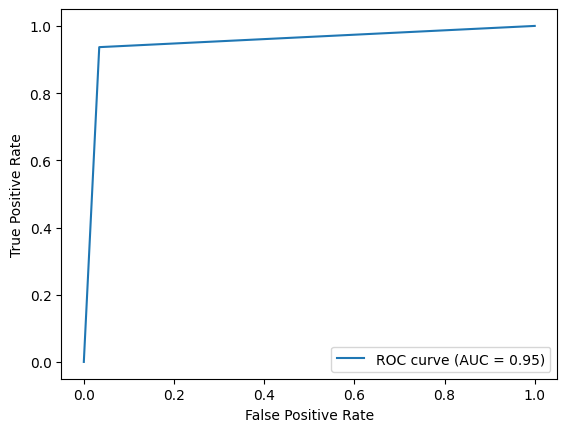

In [ ]:
#ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_DT)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show() #dioganaliga tekkis chiqsa yomon ishlayapti degani. 90° burchak ostida chizilsa zo'r degani

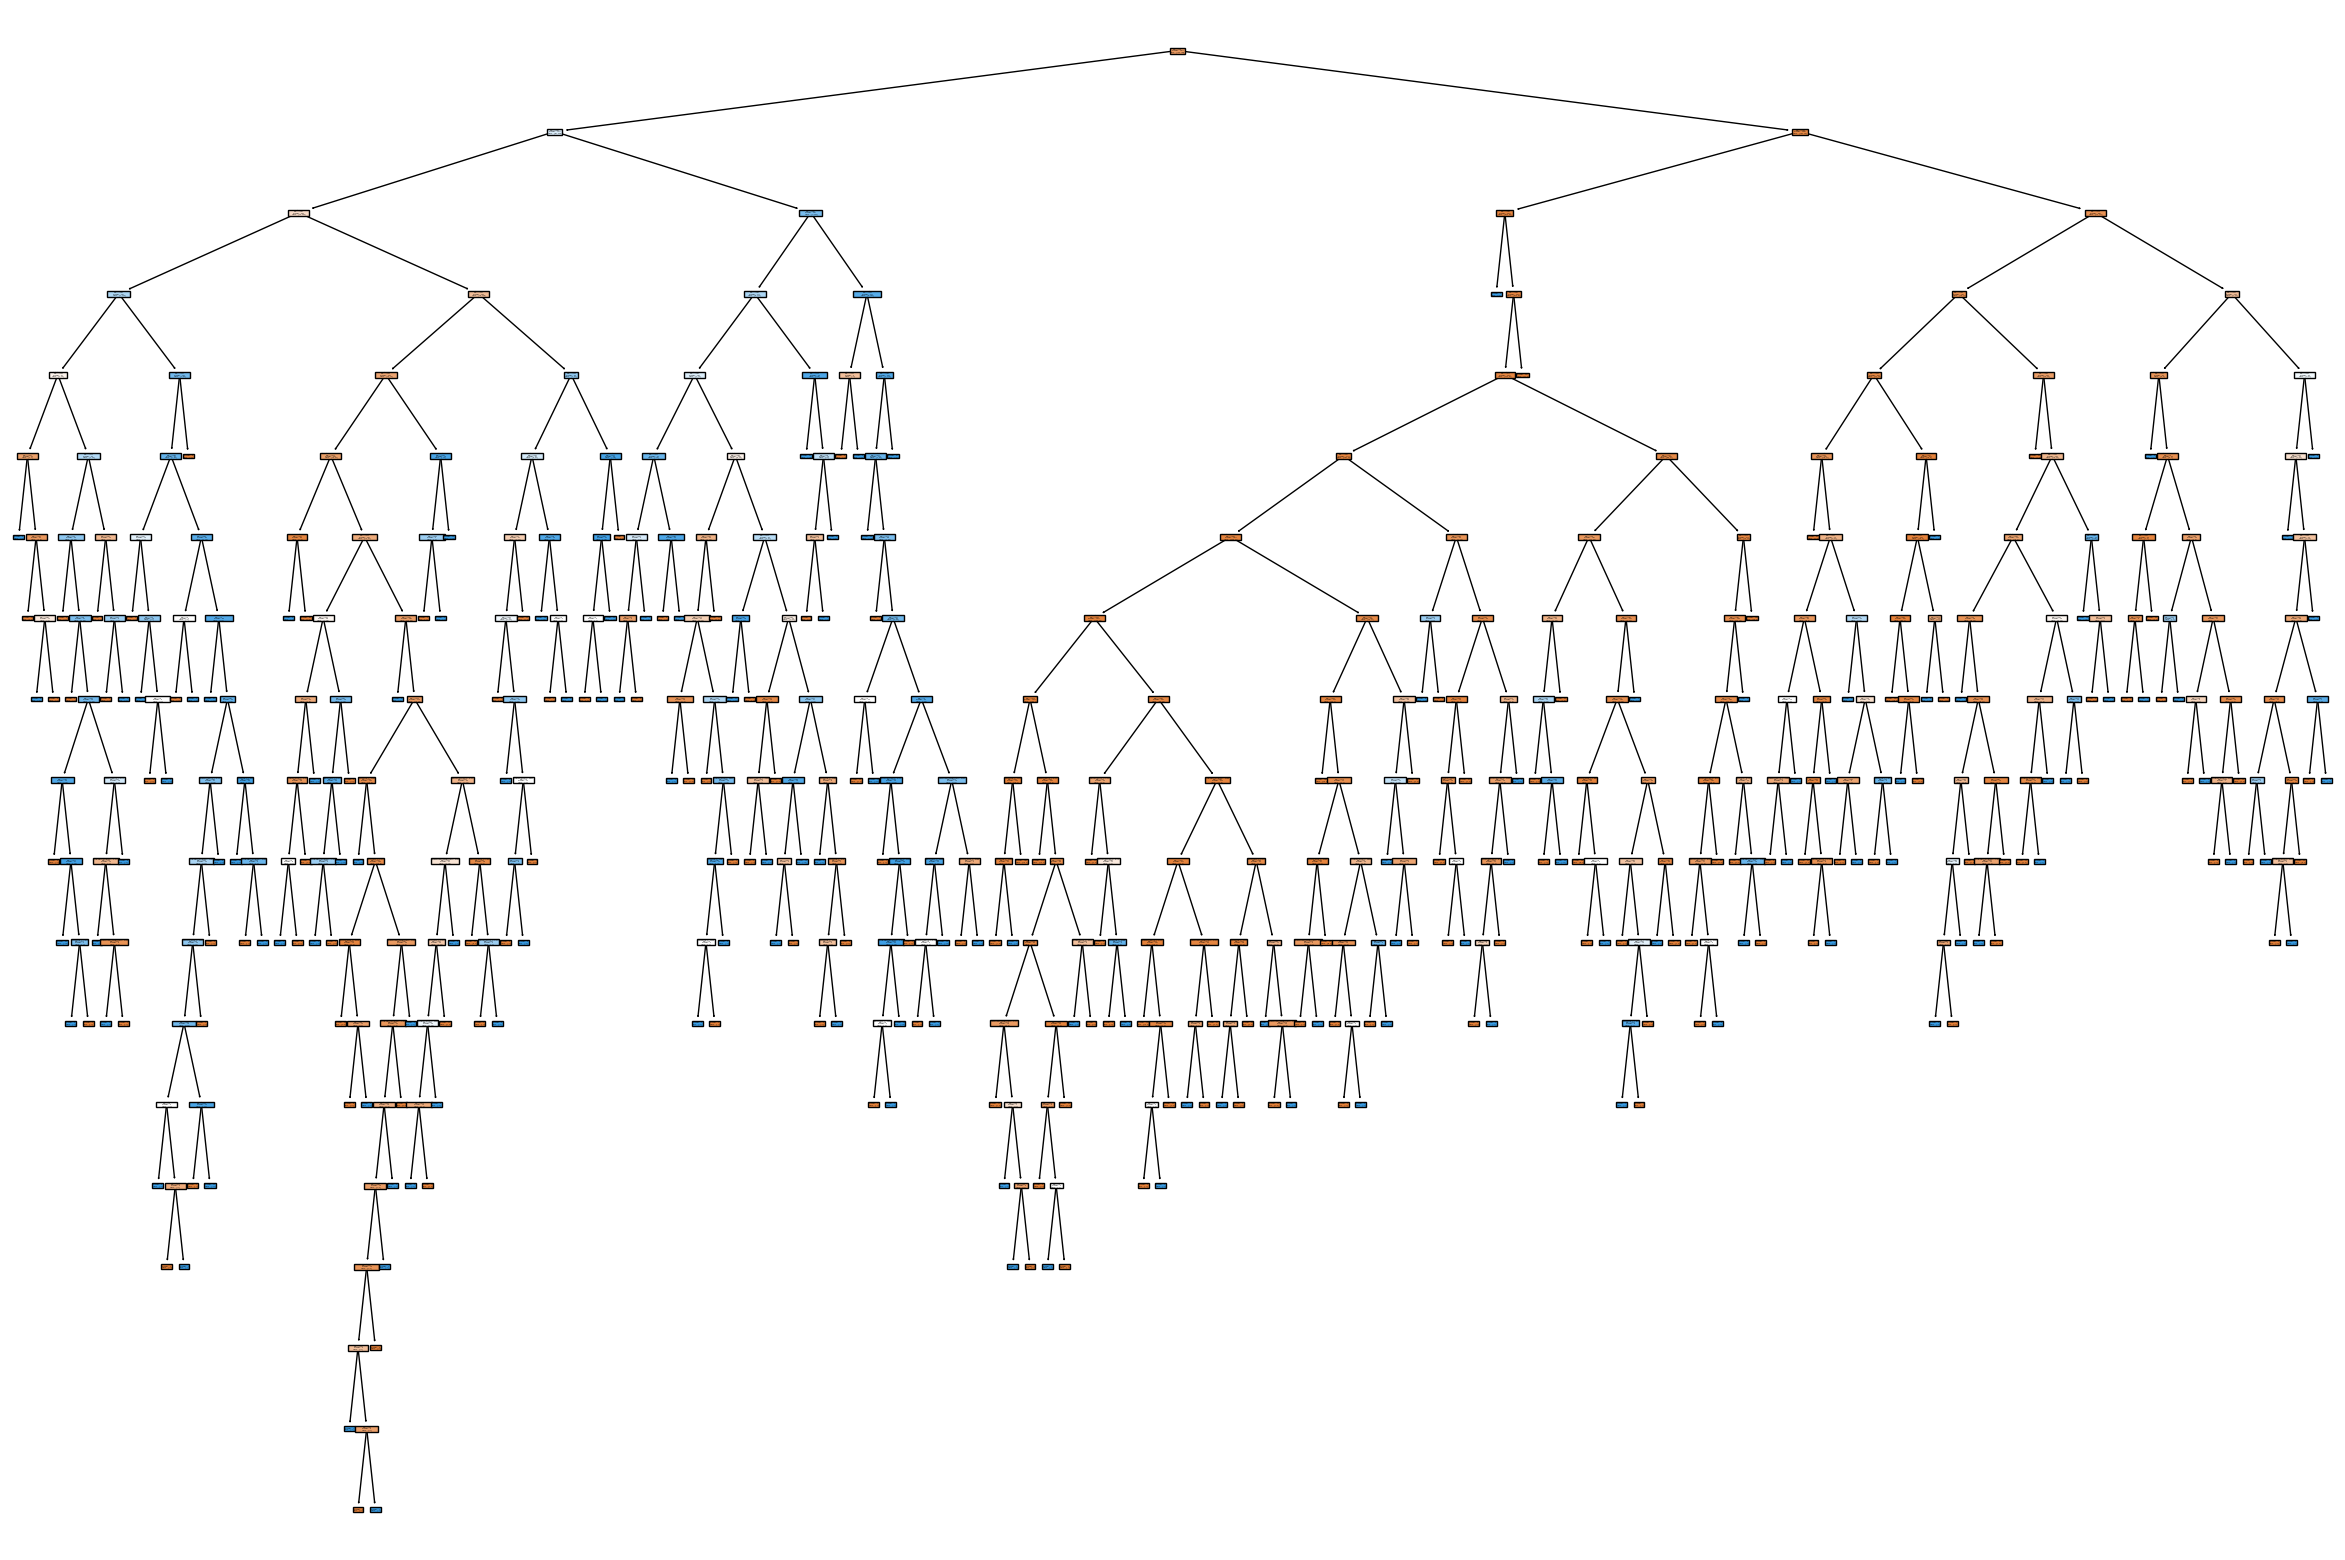

In [ ]:
cols =  df.drop('Churn', axis=1).columns

plt.figure(figsize=(30, 20))
plot_tree(DT_model, feature_names=cols, filled=True)
plt.show()

##Gridsearch
Hozircha faqat Desision Tree uchun ishlatildi

In [ ]:
param_grid =  { 'max_depth' : np.arange(1, 100)} #kerakli chuqurlikni topib olamiz
model_DT = DecisionTreeClassifier()
grid = GridSearchCV(model_DT, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [ ]:
grid.best_params_

{'max_depth': 42}

In [ ]:
grid.best_score_

0.9404945122703168

##RandomForest

In [ ]:
RF_model = RandomForestClassifier(n_estimators=9) #modelda nechta daraxt ishlatilishini belgilaydi.
RF_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=9)

In [ ]:
#classification_report
y_pred_RF = RF_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred_RF))
print("Aniqlik", metrics.accuracy_score(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       936
           1       0.93      0.80      0.86       190

    accuracy                           0.96      1126
   macro avg       0.94      0.89      0.92      1126
weighted avg       0.95      0.96      0.95      1126

Aniqlik 0.955595026642984


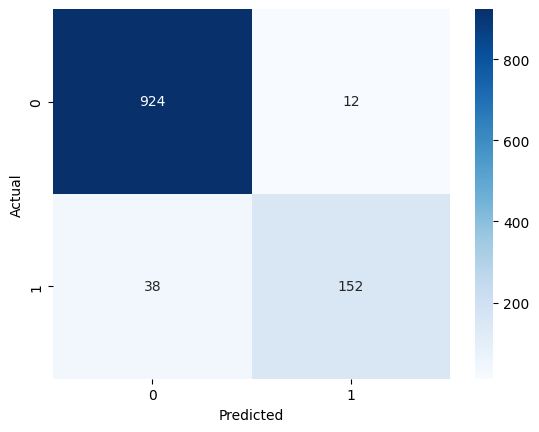

In [ ]:
#confusion matrix bilan test
conf_mat = metrics.confusion_matrix(y_test, y_pred_RF)
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()# ketib qolmaganlarning 924 tasini to'g'ri topdi. ketib qolganlardan 152 tasini to'g'ri topdi

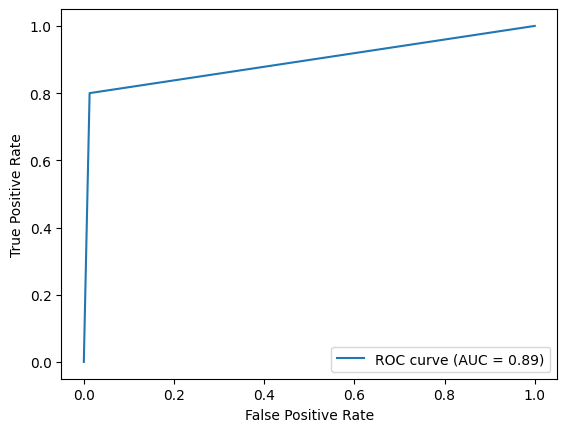

In [ ]:
#ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_RF)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show() #dioganaliga tekkis chiqsa yomon ishlayapti degani. 90° burchak ostida chizilsa zo'r degani

##XGBoots
Decision Tree modelini kuchaytiradigan model

In [ ]:
XGB_model = XGBClassifier()
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#classification_report
y_pred_XGB = XGB_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred_XGB))
print("Aniqlik", metrics.accuracy_score(y_test, y_pred_XGB))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       936
           1       0.91      0.91      0.91       190

    accuracy                           0.97      1126
   macro avg       0.95      0.94      0.95      1126
weighted avg       0.97      0.97      0.97      1126

Aniqlik 0.9698046181172292


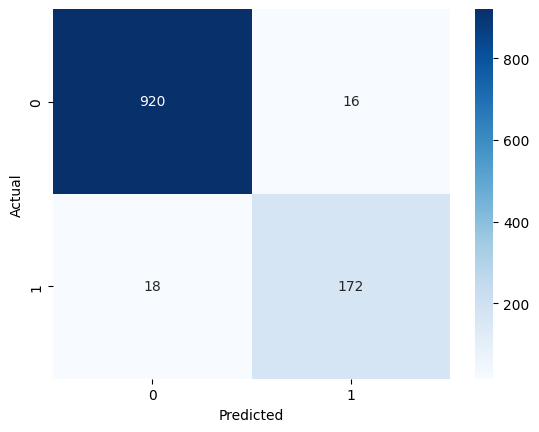

In [ ]:
#confusion matrix bilan test
conf_mat = metrics.confusion_matrix(y_test, y_pred_XGB)
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()# ketib qolmaganlarning 920 tasini to'g'ri topdi. ketib qolganlardan 172 tasini to'g'ri topdi

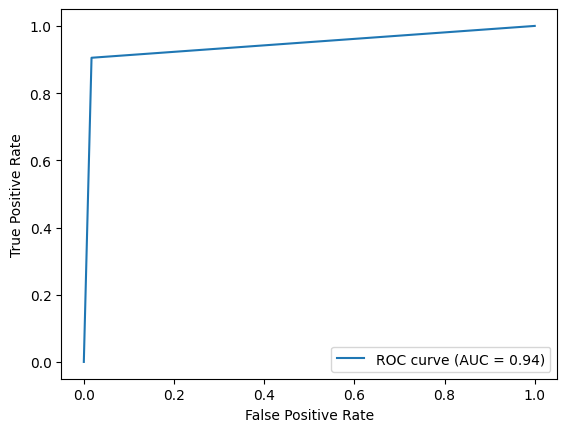

In [ ]:
#ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_XGB)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show() #dioganaliga tekkis chiqsa yomon ishlayapti degani. 90° burchak ostida chizilsa zo'r degani